In [1]:
import numpy as np
from numpy import inf

import astropy.constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord

import bagpipes as pipes

import matplotlib.pyplot as plt

'''Note: I used copilot to refine the structure of my code's comments and figure displays.'''

"Note: I used copilot to refine the structure of my code's comments and figure displays."

### Part A: Mass-to-light ratios and age in simple stellar populations

part 1)
Use Bagpipes to produce the spectra of Simple Stellar Populations with solar metallicity and reproduce the right panel of Figure 3.33 in Schneider. (Note: you won't get an exact match, especially in the UV where spectral libraries are uncertain for old stellar populations.)

In [2]:
goodss_filt_list = np.array(['filter_spec/Generic_Johnson_UBVRIJHKL.B.dat', 'filter_spec/Generic_Johnson_UBVRIJHKL.V.dat',\
                             'filter_spec/Generic_Johnson_UBVRIJHKL.R.dat', 'filter_spec/Generic_Johnson_UBVRIJHKL.K.dat'])

In [3]:
t1 = np.array([0.001, 0.01, 0.1, 0.4, 1, 4, 13]) # Time in Gyr
model_list = []

for i in range(len(t1)):
    burst = {}                           # Delta function burst
    burst["age"] = t1[i]                 # Age in Gyr
    burst["massformed"] = 9.            # Mass formed in stars
    burst["metallicity"] = 1             # Metallicity of the stellar population

    model_components = {}                   
    model_components["redshift"] = 0.0   # Redshift      
    model_components["burst"] = burst    # Burst star formation history

    # Create the Bagpipes model
    model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(100., 20000., 5.))
    model_list.append(model)


/usr/local/anaconda/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/usr/local/anaconda/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


In [4]:
wavelengths_complete = []
fluxes_complete = []

for i in range(len(model_list)):
    wavelengths = model_list[i].spectrum.T[0]                                                 # Array of wavelengths
    fluxes = (model_list[i].spectrum.T[1]  * u.erg/u.s/u.Angstrom).to(u.Lsun/u.Angstrom)      # Array of fluxes

    wavelengths_complete.append(wavelengths)
    fluxes_complete.append(fluxes)


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_81649/72178811.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda / \AA$', fontsize=14)
/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_81649/72178811.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$log(F_\lambda / L_{\odot} / \AA / M_{\odot})$', fontsize=14)


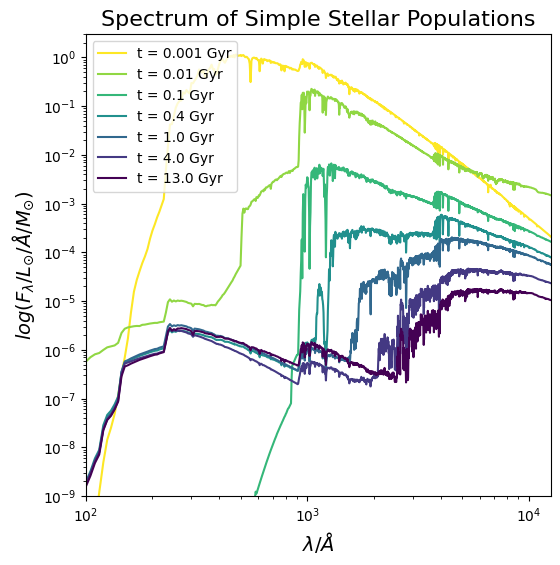

In [5]:
colors = plt.cm.viridis_r(np.linspace(0, 1, len(model_list)))
plt.figure(figsize=(6, 6))
for i in range(len(model_list)):    
    plt.loglog(wavelengths_complete[i], fluxes_complete[i]/(10**9), label=f't = {t1[i]} Gyr', color=colors[i])

plt.xlabel('$\lambda / \AA$', fontsize=14)
plt.ylabel('$log(F_\lambda / L_{\odot} / \AA / M_{\odot})$', fontsize=14)
plt.xlim(1e2, 10**(4.1))
plt.ylim(1e-9, 3)
plt.legend(loc='best')
plt.title('Spectrum of Simple Stellar Populations', fontsize=16)
plt.savefig('mini_project_3_images/ssp_spectra.png', dpi = 250)
plt.show()

part 2) Using a denser grid of stellar population ages, plot the mass-to-light ratio in the B-, V-, R-, and K-bands and explain the trends based on your understanding of the stars that produce light at these wavelengths.

In [6]:
t2 = np.geomspace(0.001, 13, 100) # Time in Gyr
model_list_2 = []

for i in range(len(t2)):
    burst = {}                           # Delta function burst
    burst["age"] = t2[i]                 # Age in Gyr
    burst["massformed"] = 9.             # Mass formed in stars
    burst["metallicity"] = 1             # Metallicity of the stellar population

    model_components = {}                   
    model_components["redshift"] = 0.0   # Redshift      
    model_components["burst"] = burst    # Burst star formation history

    # Create the Bagpipes model and plot the spectrum
    model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(100., 20000., 5.))
    model_list_2.append(model)


In [7]:
mass = np.ones(100)*(10**9)
lum_B = []
lum_V = []
lum_R = []
lum_K = []

for time in range(len(model_list_2)):
    model_list_2[time].photometry  # accessing photometry 
    # make sure to multiply by equivalent width of the band to get luminosity
    lum_B.append(((model_list_2[time].photometry[0] * 1011.70 * u.erg/u.s).to(u.Lsun)).value) # luminosity in B band
    lum_V.append(((model_list_2[time].photometry[1] * 889.8 * u.erg/u.s).to(u.Lsun)).value)   # luminosity in V band
    lum_R.append(((model_list_2[time].photometry[2] * 2070 * u.erg/u.s).to(u.Lsun)).value)    # luminosity in R band
    lum_K.append(((model_list_2[time].photometry[3] * 5785 * u.erg/u.s).to(u.Lsun)).value)    # luminosity in K band

m_l_B = mass/np.array(lum_B)
m_l_V = mass/np.array(lum_V)
m_l_R = mass/np.array(lum_R)
m_l_K = mass/np.array(lum_K)

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_81649/2819546701.py:8: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$M_\odot/L_\odot$', fontsize=15)


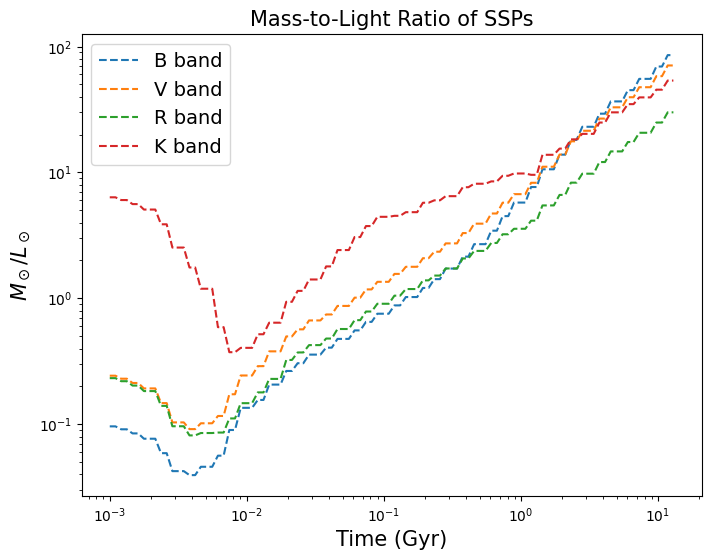

In [8]:
plt.figure(figsize=(8, 6))
plt.loglog(t2, m_l_B,'--', label='B band')
plt.loglog(t2, m_l_V,'--', label='V band')
plt.loglog(t2, m_l_R,'--', label='R band')
plt.loglog(t2, m_l_K,'--', label='K band')

plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('$M_\odot/L_\odot$', fontsize=15)
plt.legend(loc = 'best', fontsize=14)
plt.title('Mass-to-Light Ratio of SSPs', fontsize=15)
plt.savefig('mini_project_3_images/ssp_mass_to_light.png', dpi = 250)
plt.show()

### Part B: Mass-to-light ratios and color

Compute the rest-frame B-V color (on the AB system) for each of your simple stellar population models and plot R-band mass-to-light ratio versus B-V color.  Do the same for a galaxy with a constant star-formation rate and compare them. Based on these plots, describe how you would go about estimating the stellar mass of a galaxy given observations of its B-, V-, and R-band. What would you expect to be the level of systematic uncertainty in the mass-to-light ratio at a typical B-V due to uncertainty in star-formation history (meaning don't worry about uncertainty associated with dust or the IMF).

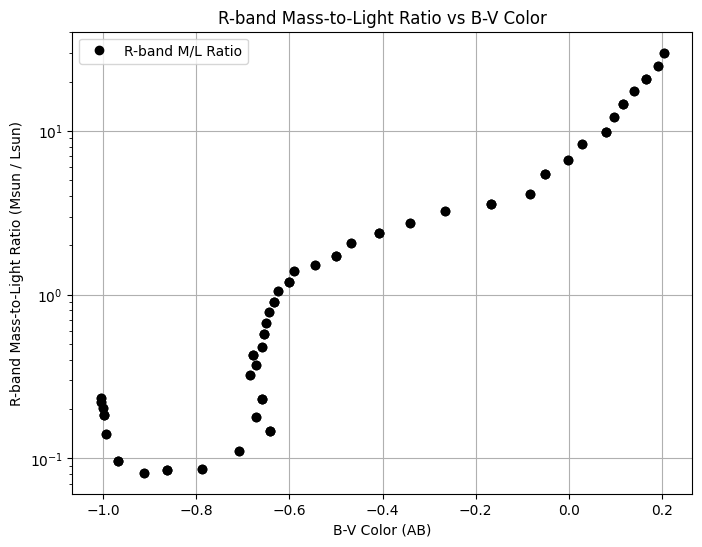

In [9]:
def bv_mlR(model_list_input):

    # store B-V color and R-band mass-to-light ratio
    bv_colors = []
    ml_ratios_R = []

    # Loop over each time step in model_list
    for time_step in range(len(model_list_input)):

        lum_b = (((model_list_input[time_step].photometry[0]* 1011.70 * u.erg/u.s).to(u.Lsun))) # B band erg/sec/angstrom 
        lum_v = (((model_list_input[time_step].photometry[1]* 889.80 * u.erg/u.s).to(u.Lsun)))
        lum_r = (((model_list_input[time_step].photometry[2]* 2070.00 * u.erg/u.s).to(u.Lsun)))

        # Calculate B-V color
        bv_color = -2.5 * np.log10(lum_b/lum_v) # (flux_B.value/flux_V.value) 
        bv_colors.append(bv_color)
        
        # Calculate R-band mass-to-light ratio (assuming a mass of 10^9 solar masses)
        mass_to_light_R = (10**9 * u.Msun) / lum_r
        ml_ratios_R.append(mass_to_light_R.value)
    return bv_colors, ml_ratios_R


bv_colors, ml_ratios_R = bv_mlR(model_list_2)

# Plot R-band mass-to-light ratio vs. B-V color
plt.figure(figsize=(8, 6))
plt.plot(bv_colors, ml_ratios_R, 'o', color='k', label="R-band M/L Ratio")
plt.xlabel("B-V Color (AB)")
plt.ylabel("R-band Mass-to-Light Ratio (Msun / Lsun)")
plt.yscale("log")
plt.title("R-band Mass-to-Light Ratio vs B-V Color")
plt.legend()
plt.grid(True)
plt.show()



In [10]:
 ####  Galaxy with a constant SFR  ####
t_const = t2
model_const_sfr = []
for i in range(len(t_const)):
    constant = {}                           # Delta function burst
    constant["age_max"] = t_const[i]        # how long sf happens
    constant['age_min'] = 0.0
    constant["massformed"] = 9             # Mass formed in stars
    constant["metallicity"] = 1             # Metallicity of the stellar population

    model_components = {}                   
    model_components["redshift"] = 0.0         # Redshift      
    model_components["constant"] = constant    # Burst star formation history

    # Create the Bagpipes model and plot the spectrum
    model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(100., 20000., 5.))
    model_const_sfr.append(model)

/usr/local/anaconda/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  self.component_sfrs[name] *= desired_mass/mass_norm
/usr/local/anaconda/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:106: RuntimeWarning: invalid value encountered in multiply
  self.component_sfrs[name] *= desired_mass/mass_norm
/usr/local/anaconda/lib/python3.12/site-packages/bagpipes/models/model_galaxy.py:559: RuntimeWarning: divide by zero encountered in log10
  self.uvj = -2.5*np.log10(self._calculate_photometry(0., uvj=True))


In [11]:
def bv_mlR_constSFR(model_list_input):

    # store B-V color and R-band mass-to-light ratio
    bv_colors = []
    ml_ratios_R = []

    # Loop over each time step in model_list
    for time_step in range(len(model_list_input)):

        lum_b = (((model_list_input[time_step].photometry[0]* 1011.70 * u.erg/u.s).to(u.Lsun))) # B band erg/sec/angstrom 
        lum_v = (((model_list_input[time_step].photometry[1]* 889.80 * u.erg/u.s).to(u.Lsun)))
        lum_r = (((model_list_input[time_step].photometry[2]* 2070.00 * u.erg/u.s).to(u.Lsun)))

        # Calculate B-V color
        bv_color = -2.5 * np.log10(lum_b/lum_v) # (flux_B.value/flux_V.value) 
        bv_colors.append(bv_color)
        
        # Calculate R-band mass-to-light ratio (assuming a mass of 10^9 solar masses)
        mass_to_light_R = (10**(model.sfh.stellar_mass) * u.Msun) / lum_r
        ml_ratios_R.append(mass_to_light_R.value)
    return bv_colors, ml_ratios_R


# run the function to find the B-V color and R-band mass-to-light ratio
bv_colors_const_sfr, ml_ratios_R_const_sfr = bv_mlR_constSFR(model_const_sfr)

/usr/local/anaconda/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


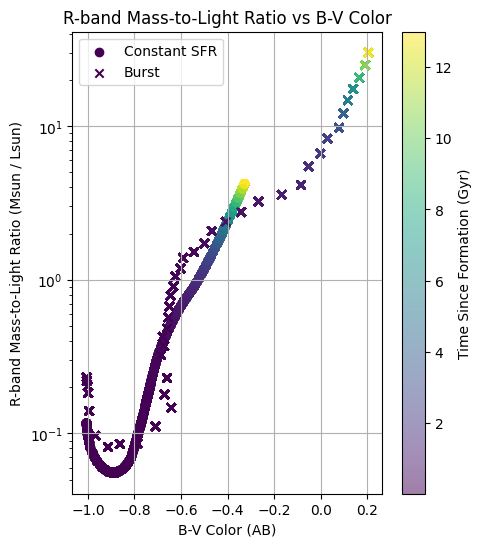

' The stars that formed first in this diagram are the ones with a high time of formationn value. Hence, the lighter ones.'

In [12]:
# Plot R-band mass-to-light ratio vs. B-V color
colors = plt.cm.viridis_r(np.linspace(0, 1, len(bv_colors_const_sfr)))

plt.figure(figsize=(5, 6))
plt.scatter(bv_colors_const_sfr[-1], ml_ratios_R_const_sfr[-1], c=t2[0], cmap='viridis', label = 'Constant SFR')
plt.scatter(bv_colors[0], ml_ratios_R[0], c=t2[0], marker = 'x', cmap='viridis', label = 'Burst')
for i in range(len(bv_colors_const_sfr)):
    # plt.plot(bv_colors_const_sfr[i], ml_ratios_R_const_sfr[i], 'o', color=colors[i], alpha=0.5) 
    sc = plt.scatter(bv_colors_const_sfr, ml_ratios_R_const_sfr, c=t2, cmap='viridis', alpha=0.5)
    plt.scatter(bv_colors, ml_ratios_R, c=t2, marker = 'x', cmap='viridis')

cbar = plt.colorbar(sc)
cbar.set_label('Time Since Formation (Gyr)')

# plt.plot(bv_colors, ml_ratios_R, 'x', color='black', ms = 8, label="R-band M/L Ratio")
plt.xlabel("B-V Color (AB)")
plt.ylabel("R-band Mass-to-Light Ratio (Msun / Lsun)")
plt.yscale("log")
plt.title("R-band Mass-to-Light Ratio vs B-V Color")
plt.legend()
plt.grid(True)
plt.savefig('mini_project_3_images/mass_to_light_vs_color.png', dpi = 250)
plt.show()

''' The stars that formed first in this diagram are the ones with a high time of formationn value. Hence, the lighter ones.'''

In [13]:
## Looking at B-V values -0.7 to -0.5
bv_colors_const_sfr = np.array(bv_colors_const_sfr)
ml_ratios_R_const_sfr = np.array(ml_ratios_R_const_sfr)

# Find the indices of the B-V values between -0.7 and -0.5
indices_const_sfr = np.where((bv_colors_const_sfr > -0.7) & (bv_colors_const_sfr < -0.5))
indices_burst = np.where((np.array(bv_colors) > -0.7) & (np.array(bv_colors) < -0.5))

#calculate uncertainty in the mass to light ratio
uncertainty_const_sfr = np.std(ml_ratios_R_const_sfr[indices_const_sfr])
mean_const_sfr = np.mean(ml_ratios_R_const_sfr[indices_const_sfr])
uncertainty_burst = np.std(np.array(ml_ratios_R)[indices_burst])
mean_burst = np.mean(np.array(ml_ratios_R)[indices_burst])

print(f"Mean mass-to-light ratio for constant SFR: {mean_const_sfr:.2f} +/- {uncertainty_const_sfr:.2f}")
print(f"Mean mass-to-light ratio for burst: {mean_burst:.2f} +/- {uncertainty_burst:.2f}")



Mean mass-to-light ratio for constant SFR: 0.65 +/- 0.25
Mean mass-to-light ratio for burst: 0.67 +/- 0.42


### Part C: 
part 1) Incorporate dust extinction (use one of the extinction curves built into Bagpipes) into your models and show how reasonable amounts of dust with, say E(B-V)=0.3, change your expectations for mass-to-light ratio vs color plots from Part B. Describe how you might attempt to correct for dust given other observables beyond the rest-frame B, V, and R-band magnitudes.

$E(B-V)=A_B - A_V$, so that means 
$0.3 = A_B - A_V$. 
Then $A_V$ must be $\sim 1.3$ (found after multiple trials)

In [14]:
#### Same as above but adding DUST ####
t2 = np.geomspace(0.001, 13, 100) # Time in Gyr
model_list_partc = []

for i in range(len(t2)):
    burst = {}                           # Delta function burst
    burst["age"] = t2[i]                 # Age in Gyr
    burst["massformed"] = 9.            # Mass formed in stars
    burst["metallicity"] = 1             # Metallicity of the stellar population

    dust = {}                            # Dust attenuation
    dust["type"] = "Calzetti"            # The attenuation curve to use
    dust["Av"] = 1.3                     # The attenuation in V band

    model_components = {}                   
    model_components["redshift"] = 0.0   # Redshift      
    model_components["dust"] = dust
    model_components["burst"] = burst    # Burst star formation history


    # Create the Bagpipes model and plot the spectrum
    model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(100., 20000., 5.))
    model_list_partc.append(model)

# run the function to find the B-V color and R-band mass-to-light ratio
bv_colors_part_c, ml_ratios_R_part_c = bv_mlR(model_list_partc)


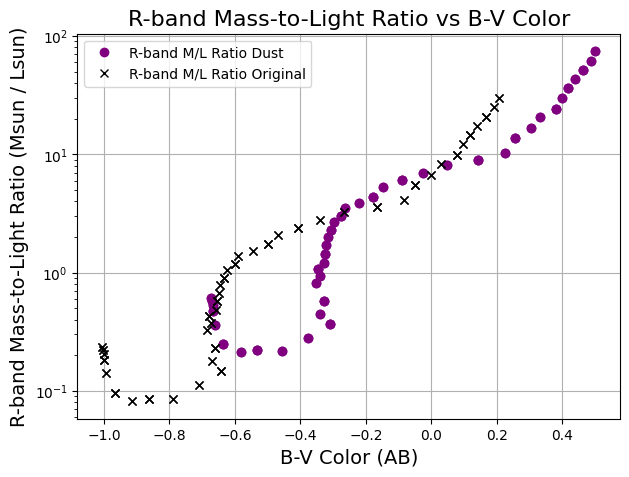

In [15]:
plt.figure(figsize=(7, 5))
plt.plot(bv_colors_part_c, ml_ratios_R_part_c, 'o', color='purple', label="R-band M/L Ratio Dust")
plt.plot(bv_colors, ml_ratios_R, 'x', color='black', label="R-band M/L Ratio Original")
plt.xlabel("B-V Color (AB)", fontsize=14)
plt.ylabel("R-band Mass-to-Light Ratio (Msun / Lsun)", fontsize=14)
plt.yscale("log")
plt.title("R-band Mass-to-Light Ratio vs B-V Color", fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig('mini_project_3_images/mass_to_light_vs_color_dust.png', dpi = 250)
plt.show()

In [16]:
# find the difference between B-V values of the two models 
bv_diff = np.array(bv_colors_part_c) - np.array(bv_colors)
print(f"Mean difference in B-V color: {np.mean(bv_diff):.2f} which is about 0.3 as desired.")

Mean difference in B-V color: 0.32 which is about 0.3 as desired.


part 2) Explore a range of metallicities above and below solar to demonstrate the age-metallicity degeneracy in stellar population models. Identify a spectral feature that you can use to estimate metallicity and create a plot of their equivalent width vs. metallicity for an old (say 8 Gyr) stellar population. Explain how spectra can break the age-metallicity degeneracy (up to a point).

In [17]:
def model_diff_metallicities(metallicities_array, t = 8):
    '''This function takes in an array of metallicities and a time t in Gyr. 
    It returns the B-V color and R-band mass-to-light ratio for each metallicity.

    Arg: mettalicities_array: array of metallicities '''
    model_list = []

    for metallicity in metallicities_array:
        burst = {}                           # Delta function burst
        burst["age"] = t                     # Age in Gyrs
        burst["massformed"] = 9.             # Mass formed in stars
        burst["metallicity"] = metallicity   # Metallicity of the stellar population

        model_components = {}                   
        model_components["redshift"] = 0.0   # Redshift      
        model_components["burst"] = burst    # Burst star formation history
        

        # Create the Bagpipes model and plot the spectrum
        model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(100., 20000., 5.))
        model_list.append(model)

    wavelengths_complete = []
    fluxes_complete = []

    for i in range(len(model_list)):
        wavelengths = model_list[i].spectrum.T[0]                                                 # Array of wavelengths
        fluxes = (model_list[i].spectrum.T[1]  * u.erg/u.s/u.Angstrom).to(u.Lsun/u.Angstrom)      # Array of fluxes

        wavelengths_complete.append(wavelengths)
        fluxes_complete.append(fluxes)
    
    return model_list, wavelengths_complete, fluxes_complete

In [18]:
metalicities = np.linspace(0.1,2,10)
model_list_metallicities, wav_met, flux_met = model_diff_metallicities(metalicities)

<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_81649/1358554853.py:25: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda / \AA$')
/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_81649/1358554853.py:26: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$log(F_\lambda / L_{\odot} / \AA / M_{\odot})$')


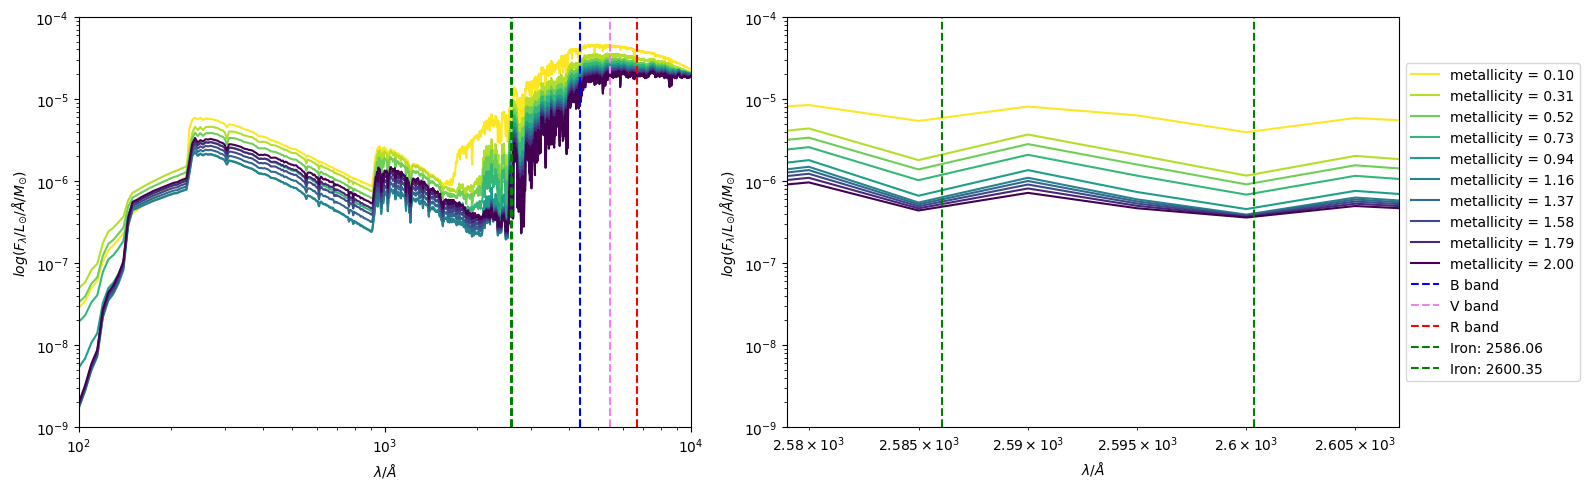

In [19]:
### Visualizing Degeneracy ###
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

colors = plt.cm.viridis_r(np.linspace(0, 1, len(model_list_metallicities)))

for i in range(len(model_list_metallicities)):    
    axs[0].loglog(wav_met[i], flux_met[i]/(10**9), label=f'metallicity = {metalicities[i]:.2f}', color=colors[i])
    axs[1].loglog(wav_met[i], flux_met[i]/(10**9), label=f'metallicity = {metalicities[i]:.2f}', color=colors[i])

# Adding vertical lines for spectral features
axs[0].vlines(4361.93, 1e-9, 10, color='b', linestyle='--', label='B band')
axs[0].vlines(5467.57, 1e-9, 10, color='violet', linestyle='--', label='V band')
axs[0].vlines(6695.83, 1e-9, 10, color='r', linestyle='--', label='R band')
axs[0].vlines(2586, 1e-9, 10, color='g', linestyle='--', label='Iron')
axs[0].vlines(2600, 1e-9, 10, color='g', linestyle='--', label='Iron')

axs[1].vlines(4361.93, 1e-9, 10, color='b', linestyle='--', label='B band')
axs[1].vlines(5467.57, 1e-9, 10, color='violet', linestyle='--', label='V band')
axs[1].vlines(6695.83, 1e-9, 10, color='r', linestyle='--', label='R band')
axs[1].vlines(2586.06, 1e-9, 10, color='g', linestyle='--', label='Iron: 2586.06')
axs[1].vlines(2600.35, 1e-9, 10, color='g', linestyle='--', label='Iron: 2600.35')

# Setting labels and limits for both subplots
for ax in axs:
    ax.set_xlabel('$\lambda / \AA$')
    ax.set_ylabel('$log(F_\lambda / L_{\odot} / \AA / M_{\odot})$')

axs[0].set_xlim(10**(2), 10**(4))
axs[0].set_ylim(1e-9, 1e-4)
axs[1].set_xlim(2586-7, 2600+7)
axs[1].set_ylim(1e-9, 1e-4)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('mini_project_3_images/metallicity_degeneracy.png', dpi = 250)
plt.show()



According to [https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=Fe+II&output_type=0&low_w=2580&upp_w=2610&unit=0&submit=Retrieve+Data&de=0&plot_out=0&I_scale_type=1&format=0&line_out=0&en_unit=0&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=0&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on]

In [20]:
# Calculating Equivalent Width vs metallicity for each line 
# equivalent width is given by 
# W = ∫ [1 - F(λ)/Fcont] dλ
# Fcont is the underlying continuum intensity (wikipedia)
# F(λ) is the intensity of the actual spectrum 
def equivalent_width(wavelengths, fluxes, line_wavelength, window=7):
    continuum_mask = ((wavelengths > line_wavelength + window ) | 
                      (wavelengths < line_wavelength - window ))
    line_mask = ((wavelengths >= line_wavelength - window) & 
                 (wavelengths <= line_wavelength + window))
    
    f_c = np.mean(fluxes[continuum_mask])
    
    equivalent_width = np.trapz(1 - fluxes[line_mask] / f_c, wavelengths[line_mask])

    return equivalent_width


In [21]:
W_1 = []
W_2 = []
for i in range(len(model_list_metallicities)):
    W_1.append(equivalent_width(wav_met[i], flux_met[i], 2586.0, window=300))
    W_2.append(equivalent_width(wav_met[i], flux_met[i], 2600.0, window=300))


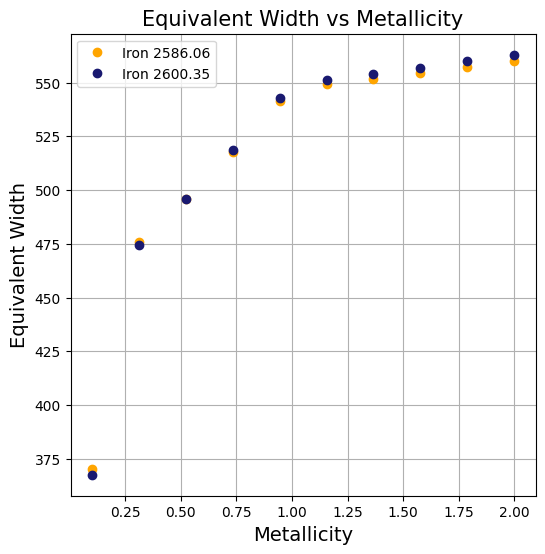

In [22]:
# Plotting equivalent width vs metallicity
plt.figure(figsize=(6, 6))
plt.plot(metalicities, W_1, 'o', color = 'orange', label='Iron 2586.06')
plt.plot(metalicities, W_2, 'o', color = 'midnightblue', label='Iron 2600.35')
plt.xlabel('Metallicity', fontsize=14)
plt.ylabel('Equivalent Width', fontsize=14)
plt.title('Equivalent Width vs Metallicity', fontsize=15)
plt.legend()
plt.grid(True)
plt.savefig('mini_project_3_images/equivalent_width_vs_metallicity.png', dpi = 250)
plt.show()
